# Task 8 (Extended). Practical analysis of advanced algorithms
Alexandra Matveeva J4134c

In [1]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
import time
import scipy
import sys
from scipy.optimize import curve_fit
from networkx.algorithms import tree

## Prim's algorithm

In [2]:
def adjacency_matrix(vertices, edges):
  edge_min = vertices - 1
  matrix = np.zeros((vertices, vertices))
  edge = 0

  temp = 0 
  while temp < vertices:
    j = np.random.randint(0, vertices)
    # print(f'({temp}, {j})')
    if temp != j:
      matrix[temp][j] = np.random.randint(1, 100)
      matrix[j][temp] = matrix[temp][j]
      
      edge += 1
      temp += 1
    
  while edge < edges:
    i = np.random.randint(0, vertices)
    j = np.random.randint(0, vertices)
    if i != j and matrix[i][j] == 0:
      matrix[i][j] = np.random.randint(1, 100)
      matrix[j][i] = matrix[i][j]
      edge += 1
  return matrix

In [3]:
def prim_alg(matrix, span_tree, V):
  selected = [0 for column in range(V)]
  # set number of edge to 0
  no_edge = 0

  selected[0] = True

  while (no_edge < V - 1):

    minimum = float('inf')
    x = 0
    y = 0
    for i in range(V):
      if selected[i]:
        for j in range(V):
          if ((not selected[j]) and matrix[i][j]):  
          # not in selected and there is an edge
            if minimum > matrix[i][j]:
              minimum = matrix[i][j]
              x = i
              y = j
    span_tree[x][y] = matrix[x][y]
    span_tree[y][x] = span_tree[x][y]
    
    selected[y] = True
    no_edge += 1
  return matrix, span_tree

In [33]:
# n^3 function estimation
def cube_function_est(x, a):
    return a * np.power(x, 3)

In [34]:
# n^2 function estimation
def sq_function_est(x, a):
    return a * np.power(x, 2)

In [5]:
# nlogn function estimation
def nlogn_function_est(x, a):
  return a * x * np.log(x)

In [ ]:
V_init = 3
V_max = 200
avg_times_cube = []

for vert in range(V_init, V_max):
  t = []
  min_e = vert - 1
  max_e = (vert - 1) * vert / 2
  ed = random.randint(min_e, max_e)

  for i in range(5):
    G = adjacency_matrix(vert, ed)
    GG = np.zeros((vert, vert))

    start_t = time.perf_counter()
    G, GG = prim_alg(G, GG, vert)
    end_t = time.perf_counter()

    t.append(end_t - start_t)

  avg_times_cube.append(np.mean(t))

In [ ]:
# python implementation

# V_init = 3
# V_max = 200
# avg_times_impl = []

# for vert in range(V_init, V_max):
#   t = []
#   min_e = vert - 1
#   max_e = (vert - 1) * vert / 2
#   ed = random.randint(min_e, max_e)

#   for i in range(5):
#     G = adjacency_matrix(vert, ed)
    
#     g = nx.Graph(G)

#     start_t = time.perf_counter()

#     tree.minimum_spanning_edges(g, algorithm="prim", data=False) 

#     end_t = time.perf_counter()

#     t.append(end_t - start_t)

#   avg_times_impl.append(np.mean(t))





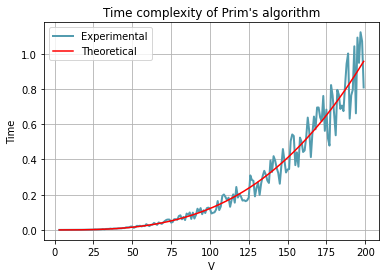

In [ ]:
x_data = [n for n in range(V_init, V_max)]

_, ax = plt.subplots()
    
ax.plot(x_data, avg_times_cube, lw = 2, color = '#539caf', alpha = 1)

popt_cube, cov_cube = curve_fit(cube_function_est, x_data, avg_times_cube)
plt.plot(x_data, cube_function_est(x_data, *popt_cube), 'r-')

plt.legend(["Experimental", "Theoretical"])

ax.grid()
ax.set_title("Time complexity of Prim's algorithm")
ax.set_xlabel('V')
ax.set_ylabel('Time')
plt.show()

In [13]:
# comparison with python realization

V = 200
E = random.randint(V - 1, (V - 1) * V / 2)

G = adjacency_matrix(V, E)
GG = np.zeros((V, V))

start_t = time.perf_counter()
G1, span_tree = prim_alg(G, GG, V)
end_t = time.perf_counter()

t_direct = end_t - start_t

g = nx.Graph(G)

start_t = time.perf_counter()
edges = tree.minimum_spanning_edges(g, algorithm="prim", data=False)
end_t = time.perf_counter()

t_impl = end_t - start_t


print(f'Vertices: {V}\n Edges: {E}')
print('Adjecency matrix:\n', G[:12, :12], '\n')
print(f'Direct method: {t_direct}\nOptimized method: {t_impl}')

Vertices: 200
 Edges: 13064
Adjecency matrix:
 [[ 0. 96.  0. 74.  0. 39. 92.  0. 33.  0.  0. 57.]
 [96.  0. 21. 21. 55. 64. 26.  0. 66. 56. 78.  0.]
 [ 0. 21.  0.  0. 21. 48.  0.  0. 88. 96. 12.  0.]
 [74. 21.  0.  0. 95.  2. 62.  0. 55.  0. 12. 37.]
 [ 0. 55. 21. 95.  0. 93. 69. 82.  0.  0.  0. 24.]
 [39. 64. 48.  2. 93.  0. 62.  0. 51.  2.  0. 13.]
 [92. 26.  0. 62. 69. 62.  0. 85.  0.  0. 32. 15.]
 [ 0.  0.  0.  0. 82.  0. 85.  0. 90. 91. 54.  0.]
 [33. 66. 88. 55.  0. 51.  0. 90.  0. 34. 47. 64.]
 [ 0. 56. 96.  0.  0.  2.  0. 91. 34.  0.  0.  0.]
 [ 0. 78. 12. 12.  0.  0. 32. 54. 47.  0.  0. 27.]
 [57.  0.  0. 37. 24. 13. 15.  0. 64.  0. 27.  0.]] 

Direct method: 1.0775100939999902
Optimized method: 7.51810000565456e-05



Algorithm visualization

Adjecency matrix:
 [[ 0.  0.  0.  0.  0.  0. 17.  0. 21.  0. 98.  0.]
 [ 0.  0.  0.  0.  0. 87.  0.  0.  0. 29.  0.  0.]
 [ 0.  0.  0.  0.  0.  5. 96. 70. 35.  0.  0.  5.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 74.  0.]
 [ 0.  0.  0.  0.  0. 41.  0. 62.  0.  0.  0.  0.]
 [ 0. 87.  5.  0. 41.  0.  0.  0.  0.  0.  0.  0.]
 [17.  0. 96.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 70.  0. 62.  0.  0.  0.  2.  0.  0. 19.]
 [21.  0. 35.  0.  0.  0.  0.  2.  0.  0.  0.  0.]
 [ 0. 29.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [98.  0.  0. 74.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  5.  0.  0.  0.  0. 19.  0.  0.  0.  0.]] 

Min Spanning Tree matrix:
 [[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 87.]
 [ 0.  0.  0.  0.  0.  5.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 41.]
 [ 0. 87.  5.  0. 41.  0.]] 



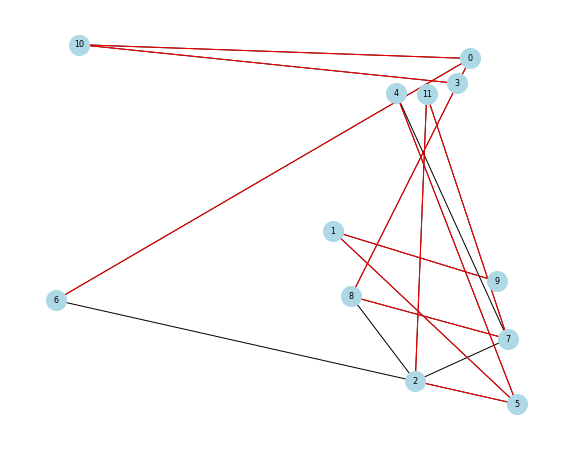

In [ ]:
print('\nAlgorithm visualization\n')

G_vis = adjacency_matrix(12, 17)
GG_vis = np.zeros((12, 12))

print('Adjecency matrix:\n', G_vis[:12, :12], '\n')

G_vis, GG_vis = prim_alg(G_vis, GG_vis, 12)

print('Min Spanning Tree matrix:\n', GG_vis[:6, :6], '\n')

G = nx.Graph(G_vis)
GG = nx.Graph(GG_vis)
pos = nx.random_layout(G)
plt.figure(3, figsize=(10, 8))
labels = {}
for k in range(12):
  labels[k] = "{0}".format(k)
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color="black")
nx.draw(G, pos, node_size = 400, node_color = "lightblue", edge_color = "black")
nx.draw_networkx_edges(GG,pos=pos, edge_color='r')

# Heap sort

In [22]:
def heapify(arr, n, i):
  largest = i  # Initialize largest as root
  l = 2 * i + 1     # left = 2*i + 1
  r = 2 * i + 2     # right = 2*i + 2
 
  # See if left child of root exists and is
  # greater than root
  if l < n and arr[largest] < arr[l]:
    largest = l
 
  # See if right child of root exists and is
  # greater than root
  if r < n and arr[largest] < arr[r]:
    largest = r
 
  # Change root, if needed
  if largest != i:
    arr[i], arr[largest] = arr[largest], arr[i]  # swap
 
    # Heapify the root.
    heapify(arr, n, largest)

In [23]:
def heapSort(arr):
  n = len(arr)
 
  # Build a maxheap.
  for i in range(n//2 - 1, -1, -1):
    heapify(arr, n, i)
 
  # One by one extract elements
  for i in range(n-1, 0, -1):
    arr[i], arr[0] = arr[0], arr[i]  # swap
    heapify(arr, i, 0)

In [25]:
# best
avg_times_best = []

for n in range(1, 600):
  t = []

  vector = np.arange(n)

  for j in range(5):
    #vector initialization
    
    start_t = time.perf_counter()
    heapSort(vector)
    end_t = time.perf_counter()

    t.append(end_t - start_t)

  avg_times_best.append(np.mean(t))

In [26]:
# average

avg_times_average = []

for n in range(1, 600):
  t = []

  for j in range(5):
    #vector initialization
    vector = np.random.uniform(low=0, high=100, size=n)

    start_t = time.perf_counter()
    heapSort(vector)
    end_t = time.perf_counter()

    t.append(end_t - start_t)

  avg_times_average.append(np.mean(t))

In [27]:
# worst
avg_times_worst = []

for n in range(1, 600):
  t = []

  vector = np.arange(n, 0, -1)

  for j in range(5):
    #vector initialization
    
    start_t = time.perf_counter()
    heapSort(vector)
    end_t = time.perf_counter()

    t.append(end_t - start_t)

  avg_times_worst.append(np.mean(t))

## Selection sort

In [28]:
def selectionSort( itemsList ):
  n = len( itemsList )
  for i in range( n - 1 ): 
    minValueIndex = i
    for j in range( i + 1, n ):
      if itemsList[j] < itemsList[minValueIndex] :
         minValueIndex = j
    if minValueIndex != i :
      temp = itemsList[i]
      itemsList[i] = itemsList[minValueIndex]
      itemsList[minValueIndex] = temp  
  return itemsList

In [29]:
# best
avg_times_sel_best = []

for n in range(1, 600):
  t = []

  vector = np.arange(n)

  for j in range(5):
    #vector initialization
    
    start_t = time.perf_counter()
    selectionSort(vector)
    end_t = time.perf_counter()

    t.append(end_t - start_t)

  avg_times_sel_best.append(np.mean(t))

In [30]:
# average

avg_times_sel_average = []

for n in range(1, 600):
  t = []

  for j in range(5):
    #vector initialization
    vector = np.random.uniform(low=0, high=100, size=n)

    start_t = time.perf_counter()
    selectionSort(vector)
    end_t = time.perf_counter()

    t.append(end_t - start_t)

  avg_times_sel_average.append(np.mean(t))

In [31]:
# worst
avg_times_sel_worst = []

for n in range(1, 600):
  t = []

  vector = np.arange(n, 0, -1)

  for j in range(5):
    #vector initialization
    
    start_t = time.perf_counter()
    selectionSort(vector)
    end_t = time.perf_counter()

    t.append(end_t - start_t)

  avg_times_sel_worst.append(np.mean(t))

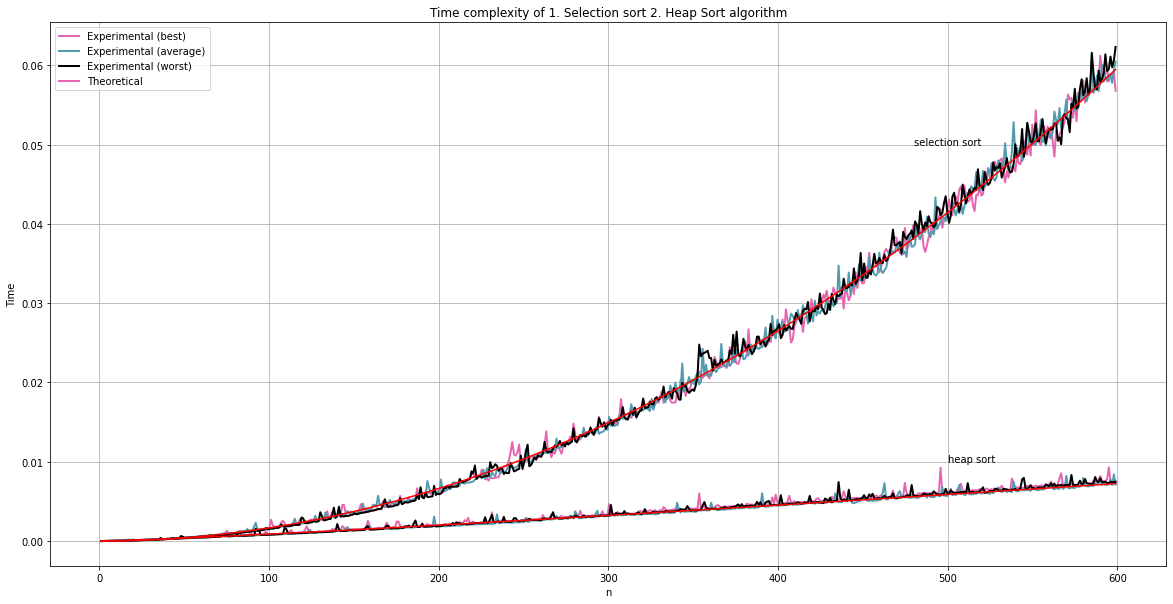

In [51]:
# x_data = [n for n in range(1, 500)]

x_data = np.linspace(1, len(avg_times_average), len(avg_times_average)-1, dtype=np.float64)

fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(x_data, avg_times_best[1:], lw = 2, color = '#E667AF', alpha = 1)    
ax.plot(x_data, avg_times_average[1:], lw = 2, color = '#539caf', alpha = 1)
ax.plot(x_data, avg_times_worst[1:], lw = 2, color = 'black', alpha = 1)
# popt, cov_cube = curve_fit(nlogn_function_est, x_data, avg_times_average)

ax.plot(x_data, avg_times_sel_best[1:], lw = 2, color = '#E667AF', alpha = 1)    
ax.plot(x_data, avg_times_sel_average[1:], lw = 2, color = '#539caf', alpha = 1)
ax.plot(x_data, avg_times_sel_worst[1:], lw = 2, color = 'black', alpha = 1)

popt1, cov = curve_fit(nlogn_function_est, x_data, avg_times_average[1:])
plt.plot(x_data, nlogn_function_est(x_data, *popt1), 'r-')

popt2, cov = curve_fit(sq_function_est, x_data, avg_times_sel_average[1:])
plt.plot(x_data, sq_function_est(x_data, *popt2), 'r-')

plt.legend(['Experimental (best)', 'Experimental (average)', 'Experimental (worst)', 'Theoretical'])

ax.annotate('selection sort', xy=(500, 0.05), xytext=(480, 0.05))
ax.annotate('heap sort', xy=(500, 0.01), xytext=(500, 0.01))

ax.grid()
ax.set_title("Time complexity of 1. Selection sort 2. Heap Sort algorithm")
ax.set_xlabel('n')
ax.set_ylabel('Time')
plt.show()